# House Price Prediction


## Develop a machine learning model for predicting house prices using Python, scikit-learn, and TensorFlow.

Dataset used - https://www.kaggle.com/datasets/vikrishnan/boston-house-prices/

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"housing.csv")
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [4]:
data.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
PRICE      54
dtype: int64

In [5]:
data.dropna(subset=['PRICE'],inplace=True)

In [6]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [7]:
data.nunique()

CRIM       451
ZN          26
INDUS       76
CHAS         2
NOX         80
RM         405
AGE        347
DIS        360
RAD          9
TAX         66
PTRATIO     46
B          320
LSTAT      409
PRICE      210
dtype: int64

In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,1.420825,12.721239,10.304889,0.077434,0.540816,6.343538,65.557965,4.043570,7.823009,377.442478,18.247124,369.826504,11.441881,23.750442
std,2.495894,24.326032,6.797103,0.267574,0.113816,0.666808,28.127025,2.090492,7.543494,151.327573,2.200064,68.554439,6.156437,8.808602
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,6.300000
25%,0.069875,0.000000,4.930000,0.000000,0.447000,5.926750,40.950000,2.354750,4.000000,276.750000,16.800000,377.717500,6.587500,18.500000
50%,0.191030,0.000000,8.140000,0.000000,0.519000,6.229000,71.800000,3.550400,5.000000,307.000000,18.600000,392.080000,10.250000,21.950000
75%,1.211460,20.000000,18.100000,0.000000,0.605000,6.635000,91.625000,5.401100,7.000000,411.000000,20.200000,396.157500,15.105000,26.600000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.410000,50.000000


In [9]:
cor_mat = data.corr()
cor_mat.shape

(14, 14)

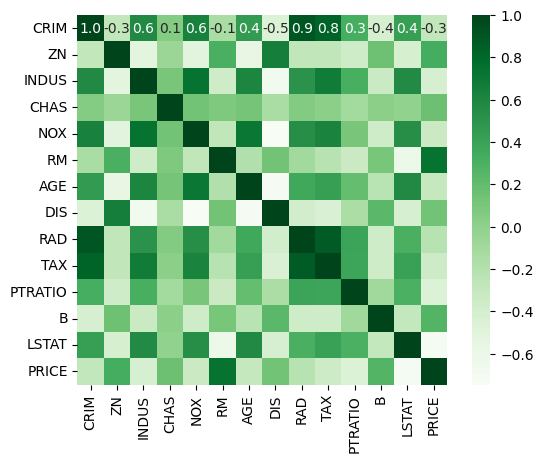

In [26]:
sns.heatmap(cor_mat, cbar=True, square= True, fmt='.1f', annot=True,  cmap='Greens')
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
X=data.drop(['PRICE'],axis=1)
y=data['PRICE']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=4)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
model.intercept_

21.55012750732621

In [16]:
coeffcients = pd.DataFrame([X_train.columns,model.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.107962
1,ZN,0.028113
2,INDUS,-0.011612
3,CHAS,3.039536
4,NOX,-8.009444
5,RM,4.767643
6,AGE,-0.012282
7,DIS,-1.171054
8,RAD,0.229629
9,TAX,-0.010495


In [17]:
y_pred = model.predict(X_train)

In [18]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_train, y_pred))


Mean Absolute Error: 2.866113431960352
Mean Squared Error: 18.24409071946878


In [19]:
feature_names = {
    'CRIM': 'Per capita crime rate by town',
    'ZN': 'Proportion of residential land zoned for lots over 25,000 sq.ft.',
    'INDUS': 'Proportion of non-retail business acres per town',
    'CHAS': 'Charles River dummy variable ',
    'NOX': 'Nitric oxides concentration (parts per 10 million)',
    'RM': 'Average number of rooms per dwelling',
    'AGE': 'Proportion of owner-occupied units built prior to 1940',
    'DIS': 'Weighted distances to five Boston employment centres',
    'RAD': 'Index of accessibility to radial highways',
    'TAX': 'Full-value property-tax rate per 10,000 USD',
    'PTRATIO': 'Pupil-teacher ratio by town',
    'B': '1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
    'LSTAT': '% lower status of the population'
}

In [20]:
def user_input():
    user_data = {}
    for feature, description in feature_names.items():
        value = float(input(f"Enter {description}: "))
        print(f"Enter {description}:",value)
        user_data[feature] = value
        

    # Create a DataFrame with user input
    user_data_df = pd.DataFrame([user_data])

    return user_data_df

In [21]:
def predict_house_price(model, user_data):
    predictions = model.predict(user_data)
    return predictions[0]

In [22]:
user_input_data = user_input()
predicted_price = predict_house_price(model, user_input_data)
print("\nPredicted House Price:")
print(predicted_price)

Enter Per capita crime rate by town: 0.00632
Enter Proportion of residential land zoned for lots over 25,000 sq.ft.: 18.0
Enter Proportion of non-retail business acres per town: 2.31
Enter Charles River dummy variable : 0.0
Enter Nitric oxides concentration (parts per 10 million): 0.538
Enter Average number of rooms per dwelling: 6.575
Enter Proportion of owner-occupied units built prior to 1940: 65.2
Enter Weighted distances to five Boston employment centres: 4.09
Enter Index of accessibility to radial highways: 1.0
Enter Full-value property-tax rate per 10,000 USD: 296.0
Enter Pupil-teacher ratio by town: 15.3
Enter 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town: 396.9
Enter % lower status of the population: 4.98

Predicted House Price:
30.183677757202844


# DRAW GRAPHS ON ACTUAL VS PREDICTED

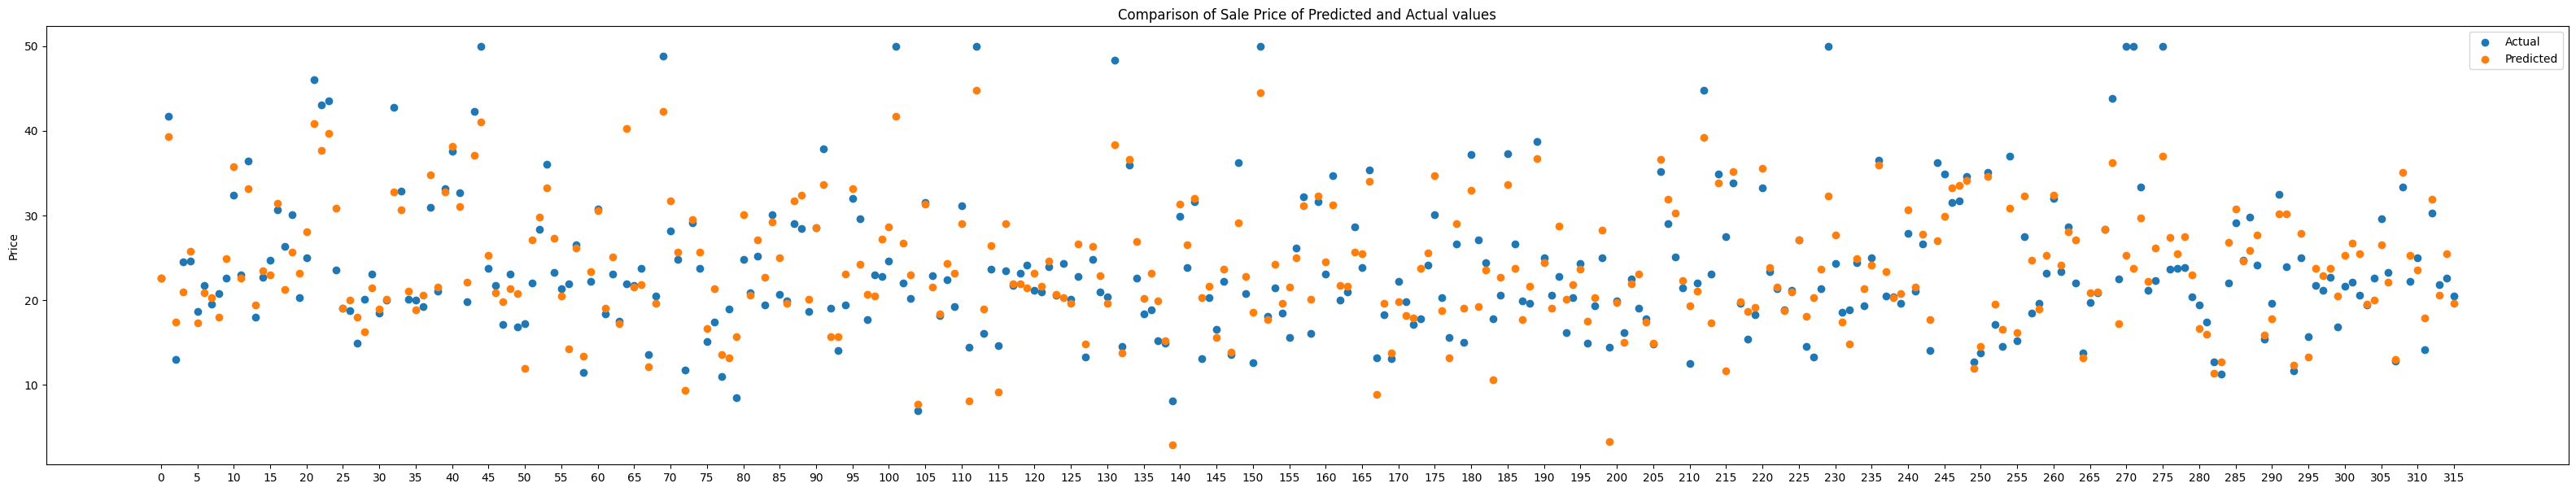

In [25]:
plt.figure(figsize=(40, 7))
plt.title('Comparison of Sale Price of Predicted and Actual values')
plt.scatter(range(len(y_train)), y_train, label='Actual')
plt.scatter(range(len(y_train)), y_pred, label='Predicted')
plt.legend()
plt.ylabel('Price')
plt.xticks(range(0, len(y_train), 5), range(0, len(y_train), 5))
plt.show()